### Preprocesado datos_sql.csv

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [93]:
# df_sql.to_csv('datos_sql.csv')
df_sql = pd.read_csv('./Datos/datos_sql.csv')
df_sql = df_sql.drop('Unnamed: 0',axis=1)
df_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11167 entries, 0 to 11166
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ehr                      11167 non-null  int64  
 1   n_tumor                  11167 non-null  int64  
 2   t_category               11167 non-null  object 
 3   n_category               11167 non-null  int64  
 4   m_category               11167 non-null  int64  
 5   t_category_after_neoadj  5677 non-null   object 
 6   n_category_after_neoadj  5677 non-null   float64
 7   m_category_after_neoadj  5627 non-null   float64
 8   stage_diagnosis          11167 non-null  object 
 9   stage_after_neo          6064 non-null   object 
 10  grade                    11167 non-null  int64  
 11  ductal                   6324 non-null   float64
 12  lobular                  1564 non-null   float64
 13  neoadjuvant              11167 non-null  object 
dtypes: float64(4), int64(5

In [94]:
df_sql.isnull().sum()

ehr                           0
n_tumor                       0
t_category                    0
n_category                    0
m_category                    0
t_category_after_neoadj    5490
n_category_after_neoadj    5490
m_category_after_neoadj    5540
stage_diagnosis               0
stage_after_neo            5103
grade                         0
ductal                     4843
lobular                    9603
neoadjuvant                   0
dtype: int64

In [95]:
df_sql['ductal'].value_counts()

1.0    6324
Name: ductal, dtype: int64

In [96]:
df_sql['ductal'] = df_sql['ductal'].fillna(0)

In [97]:
df_sql['lobular'].value_counts()

1.0    1564
Name: lobular, dtype: int64

In [98]:
df_sql['lobular'] = df_sql['lobular'].fillna(0)

In [99]:
df_sql.isnull().sum()

ehr                           0
n_tumor                       0
t_category                    0
n_category                    0
m_category                    0
t_category_after_neoadj    5490
n_category_after_neoadj    5490
m_category_after_neoadj    5540
stage_diagnosis               0
stage_after_neo            5103
grade                         0
ductal                        0
lobular                       0
neoadjuvant                   0
dtype: int64

In [100]:
df_sql['n_category'] = df_sql['n_category'].astype('int64')
df_sql['m_category'] = df_sql['m_category'].astype('int64')
df_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11167 entries, 0 to 11166
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ehr                      11167 non-null  int64  
 1   n_tumor                  11167 non-null  int64  
 2   t_category               11167 non-null  object 
 3   n_category               11167 non-null  int64  
 4   m_category               11167 non-null  int64  
 5   t_category_after_neoadj  5677 non-null   object 
 6   n_category_after_neoadj  5677 non-null   float64
 7   m_category_after_neoadj  5627 non-null   float64
 8   stage_diagnosis          11167 non-null  object 
 9   stage_after_neo          6064 non-null   object 
 10  grade                    11167 non-null  int64  
 11  ductal                   11167 non-null  float64
 12  lobular                  11167 non-null  float64
 13  neoadjuvant              11167 non-null  object 
dtypes: float64(4), int64(5

In [101]:
dic = {'yes':1,'no':0}
df_sql['neoadjuvant'] = df_sql['neoadjuvant'].map(dic)
df_sql['neoadjuvant'] = df_sql['neoadjuvant'].astype('int64')
df_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11167 entries, 0 to 11166
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ehr                      11167 non-null  int64  
 1   n_tumor                  11167 non-null  int64  
 2   t_category               11167 non-null  object 
 3   n_category               11167 non-null  int64  
 4   m_category               11167 non-null  int64  
 5   t_category_after_neoadj  5677 non-null   object 
 6   n_category_after_neoadj  5677 non-null   float64
 7   m_category_after_neoadj  5627 non-null   float64
 8   stage_diagnosis          11167 non-null  object 
 9   stage_after_neo          6064 non-null   object 
 10  grade                    11167 non-null  int64  
 11  ductal                   11167 non-null  float64
 12  lobular                  11167 non-null  float64
 13  neoadjuvant              11167 non-null  int64  
dtypes: float64(4), int64(6

Para todas las variables 'after_neo', comprobamos si el número de nulos se corresponde con el número de valores 0 en la variable neoadjuvant, que indica que no han recibido este tratamiento, así podremos inputar de forma correcta estos nulos que observamos en dichas variables:

In [102]:
df_sql['neoadjuvant'].value_counts()

1    5677
0    5490
Name: neoadjuvant, dtype: int64

Observamos que ambos valores coinciden en todas menos en 'stage_after_neo', es decir, hay 5677 valores no nulos en dichas variables y 5677 valores a 1 en 'neoadjuvant', por lo que podemos imputar los nulos como ' ':

In [103]:
df_sql.loc[df_sql['neoadjuvant'] == 0, 'm_category_after_neoadj'] = 'SIN TRATAMIENTO'
df_sql.loc[df_sql['neoadjuvant'] == 0, 't_category_after_neoadj'] = 'SIN TRATAMIENTO'
df_sql.loc[df_sql['neoadjuvant'] == 0, 'n_category_after_neoadj'] = 'SIN TRATAMIENTO'
df_sql.isnull().sum()

ehr                           0
n_tumor                       0
t_category                    0
n_category                    0
m_category                    0
t_category_after_neoadj       0
n_category_after_neoadj       0
m_category_after_neoadj      50
stage_diagnosis               0
stage_after_neo            5103
grade                         0
ductal                        0
lobular                       0
neoadjuvant                   0
dtype: int64

Comenzamos por asignar a nulos a todos los pacientes que no se hayan administrado la medicación:

In [104]:
df_sql.loc[df_sql['neoadjuvant'] == 0, 'stage_after_neo'] = 'SIN TRATAMIENTO' 
df_sql.isnull().sum()

ehr                          0
n_tumor                      0
t_category                   0
n_category                   0
m_category                   0
t_category_after_neoadj      0
n_category_after_neoadj      0
m_category_after_neoadj     50
stage_diagnosis              0
stage_after_neo            119
grade                        0
ductal                       0
lobular                      0
neoadjuvant                  0
dtype: int64

Ya hemos detectado aquellos valores que son nulos en 'stage_after_neo' y sí han recibido el tratamiento neoadjuvant. Esto puede deberse a un simple error o a que aún no se le ha hecho el diagnóstico después del tratamiento. Al tratarse de pocos valores en comparación con los que tenemos, los mantendremos como nulos:

In [105]:
df_sql['stage_after_neo'] = df_sql['stage_after_neo'].fillna('SIN TRATAMIENTO')
df_sql.isnull().sum()

ehr                         0
n_tumor                     0
t_category                  0
n_category                  0
m_category                  0
t_category_after_neoadj     0
n_category_after_neoadj     0
m_category_after_neoadj    50
stage_diagnosis             0
stage_after_neo             0
grade                       0
ductal                      0
lobular                     0
neoadjuvant                 0
dtype: int64

Para la variable 'm_category_after_neoadj', al tratarse de tan solo 50 nulos, los imputamos con la moda:

In [106]:
df_sql['m_category_after_neoadj'].value_counts()

SIN TRATAMIENTO    5490
0.0                4930
1.0                 697
Name: m_category_after_neoadj, dtype: int64

In [107]:
df_sql['m_category_after_neoadj'] = df_sql['m_category_after_neoadj'].fillna(0)
df_sql.isnull().sum()

ehr                        0
n_tumor                    0
t_category                 0
n_category                 0
m_category                 0
t_category_after_neoadj    0
n_category_after_neoadj    0
m_category_after_neoadj    0
stage_diagnosis            0
stage_after_neo            0
grade                      0
ductal                     0
lobular                    0
neoadjuvant                0
dtype: int64

In [108]:
def recuento_valores(df):
    columnas = list(df.columns)
    valores = {}
    for i in range(0,len(columnas)):
        valores[columnas[i]] = df[columnas[i]].value_counts()
    return valores

In [109]:
valores = recuento_valores(df_sql)

In [123]:
def histograma(dic, variable):
    datos = dic[variable].values
    indice = list(dic[variable].index)

# Obtener colores automáticamente utilizando un mapa de colores de Matplotlib
    colores = plt.cm.tab10(range(len(set(indice))))
    plt.figure(figsize=(8,4))

    # Crear un histograma con colores diferentes para cada valor en el índice
    for i, val in enumerate(indice):
        plt.bar(str(val), datos[i], color=colores[i], edgecolor='black')

    # Ajustar los ticks del eje x automáticamente, utilizando etiquetas categóricas
    plt.xticks(list(map(str, indice)))

    # Personalizar el gráfico
    plt.title(f'Histograma de {variable}')
    plt.xlabel('Categorías')
    plt.ylabel('Frecuencia')

    # Mostrar el histograma
    plt.show()

In [111]:
df_sql['m_category_after_neoadj'].value_counts()

SIN TRATAMIENTO    5490
0                  4980
1.0                 697
Name: m_category_after_neoadj, dtype: int64

Vamos a analizar el histograma de cada variable para conocer sus distribuciones:

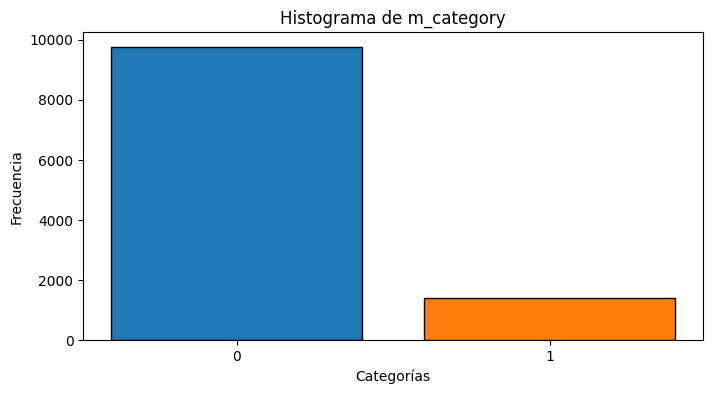

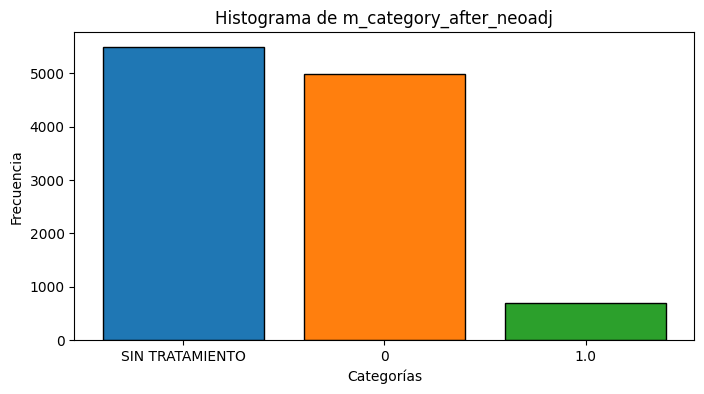

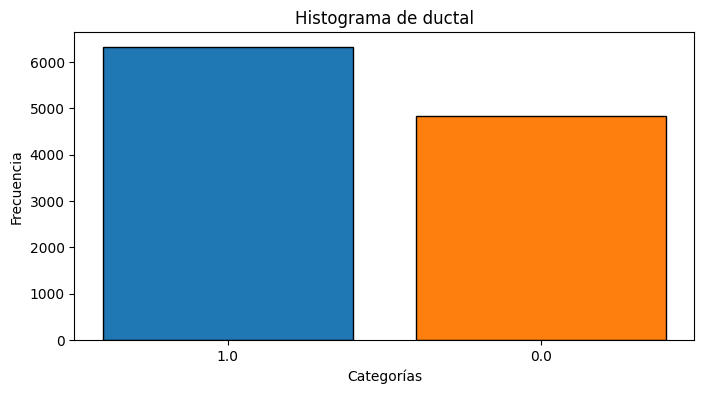

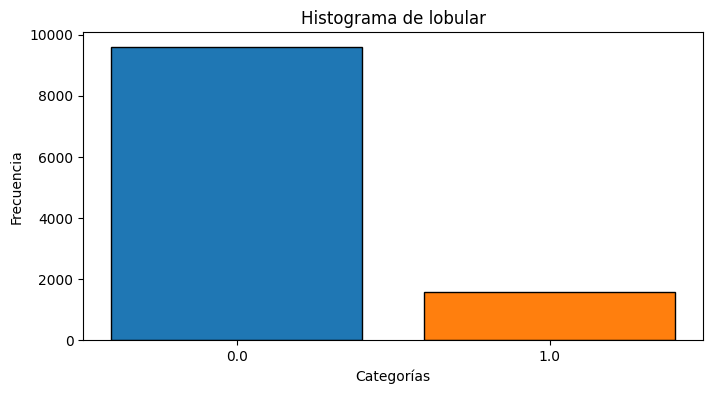

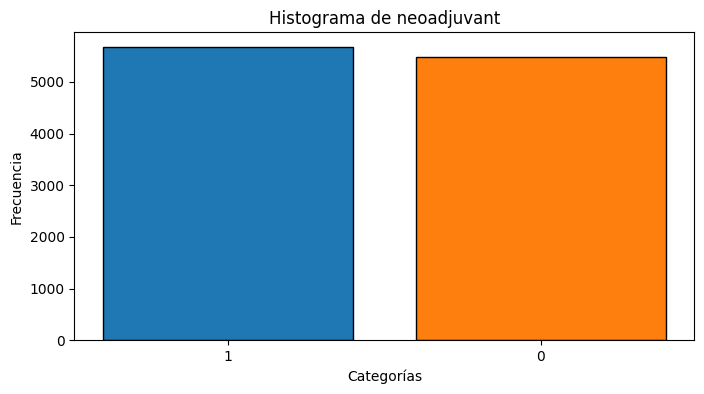

In [124]:
variables_binarias = ['m_category','m_category_after_neoadj','ductal','lobular','neoadjuvant']
for i in range(len(variables_binarias)):
    histograma(valores,variables_binarias[i])

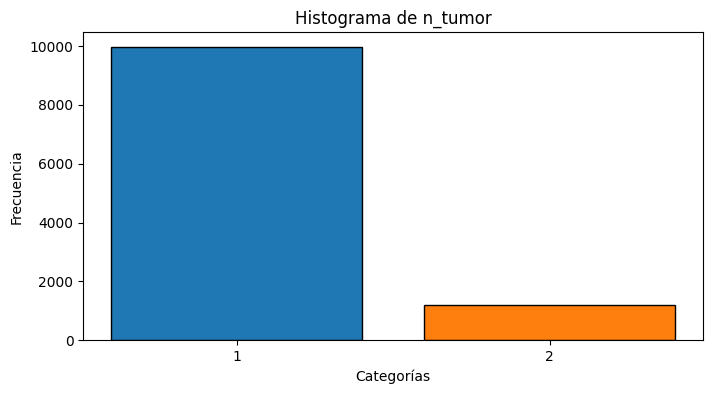

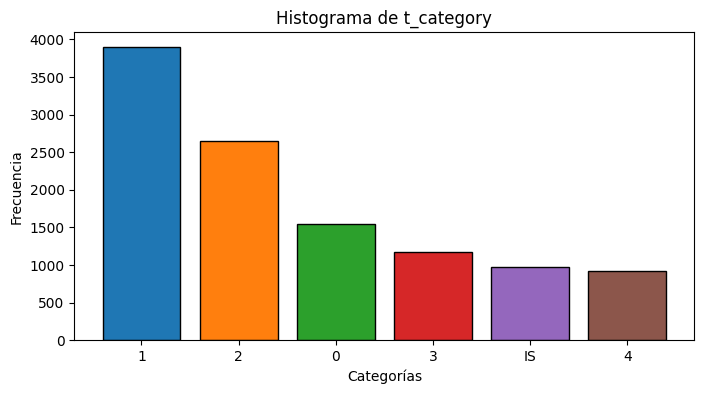

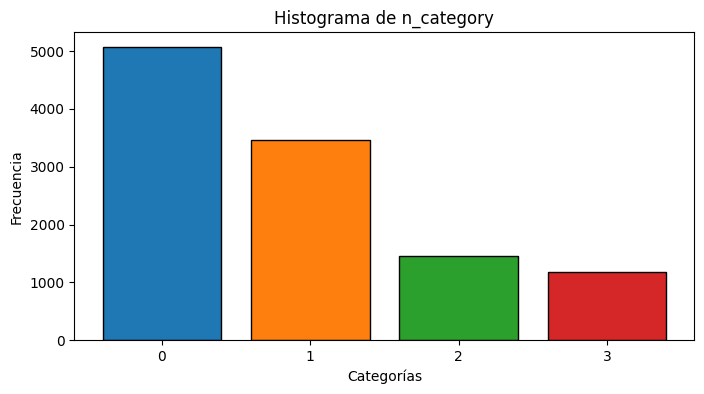

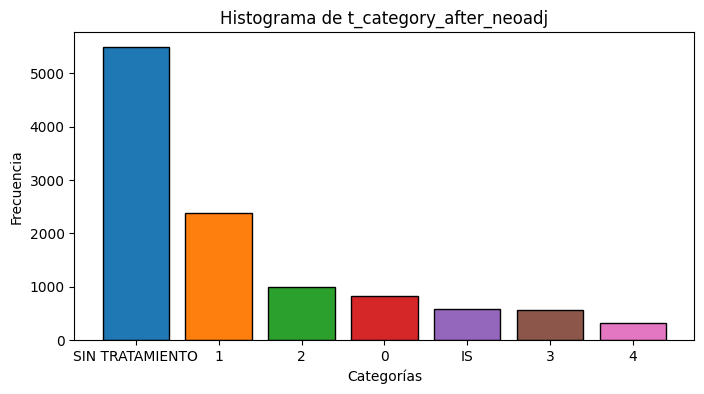

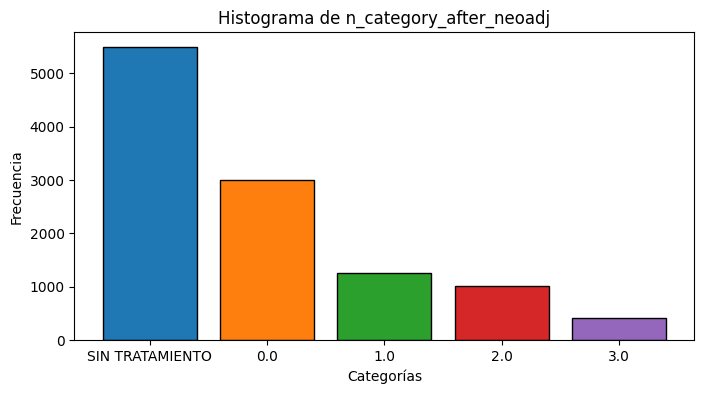

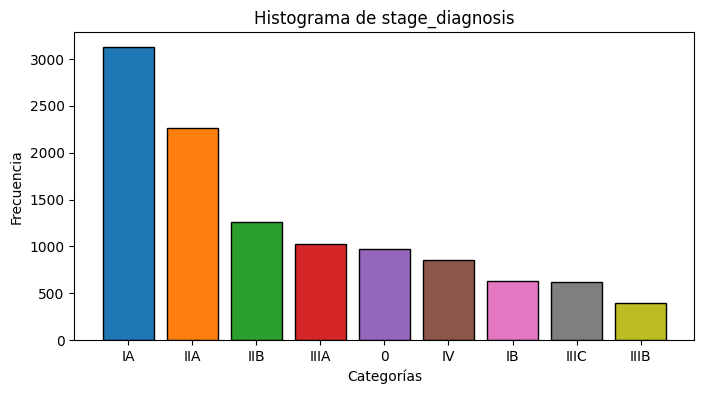

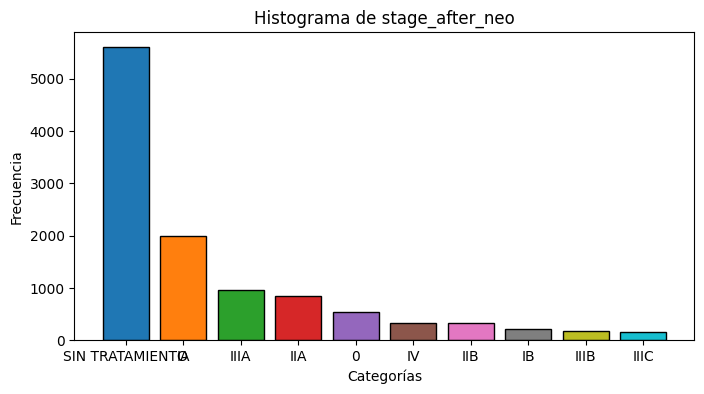

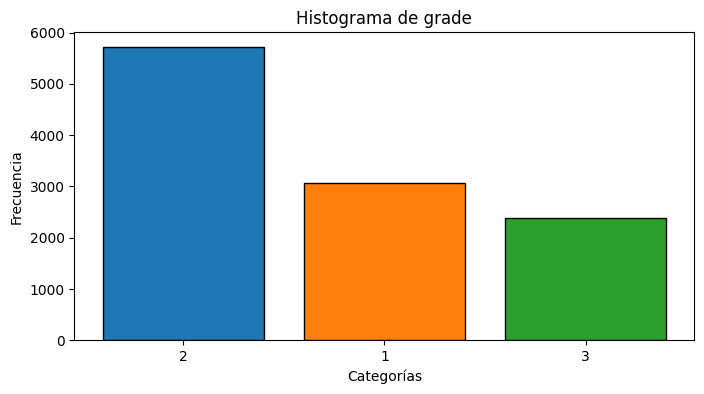

In [125]:
variables_no_binarias = ['n_tumor','t_category','n_category','t_category_after_neoadj','n_category_after_neoadj','stage_diagnosis','stage_after_neo','grade']
for i in range(len(variables_no_binarias)):
    histograma(valores,variables_no_binarias[i])